<a href="https://colab.research.google.com/github/Philipof/PredictiveAnalytics/blob/master/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import plotly 
import plotly.express as px

from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


In [ ]:
#import csv file
from google.colab import files
 
 
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
#read csv
df = pd.read_csv("heart.csv")

In [ ]:
#first 5 rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#column names
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [ ]:
#set model target and drop from features
model_features = df.columns.drop('HeartDisease')
model_target = 'HeartDisease'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')
Model target:  HeartDisease


In [ ]:
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
categorical_features_all = df[model_features].select_dtypes(include='object').columns
print(categorical_features_all)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


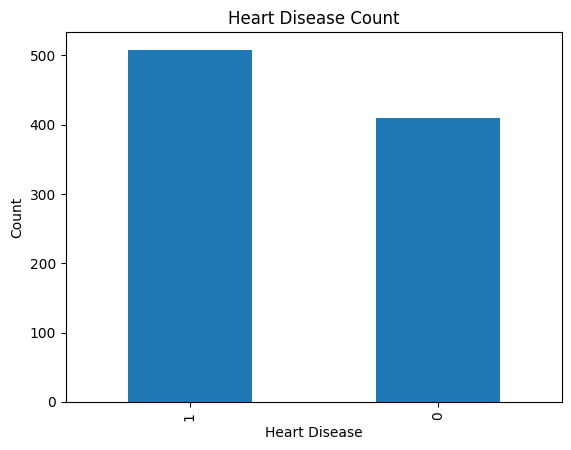

In [ ]:
#check balance of data set
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar(
title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count')
plt.show()

<ipython-input-10-e1e533328797>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


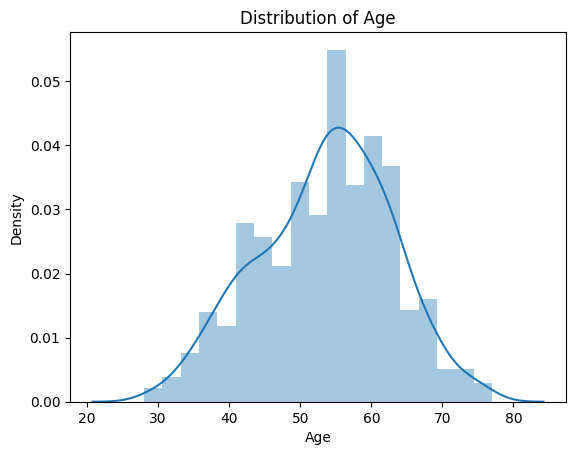

<ipython-input-10-e1e533328797>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


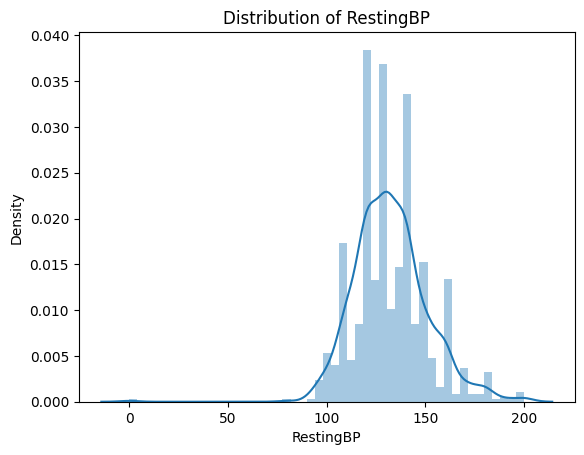

<ipython-input-10-e1e533328797>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


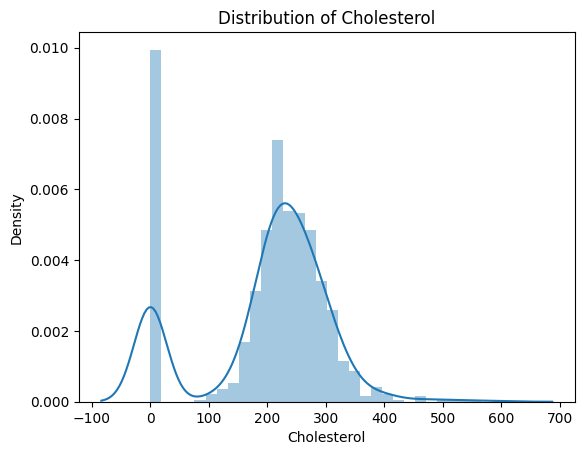

<ipython-input-10-e1e533328797>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


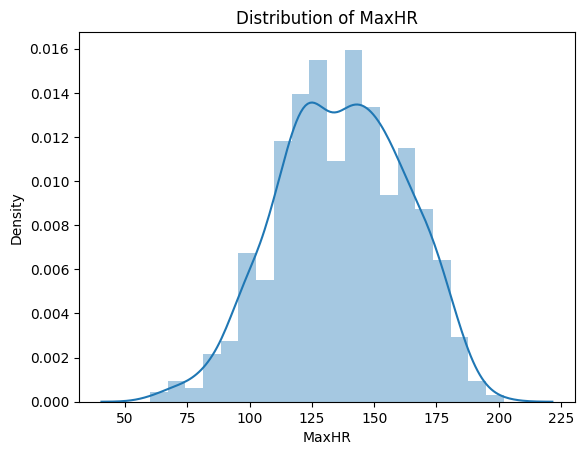

<ipython-input-10-e1e533328797>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


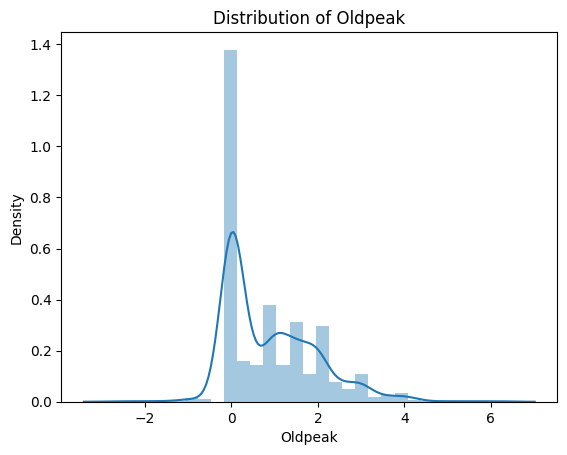

In [ ]:
# Loop over each numerical feature and plot its distribution
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for feature in numerical_features:
    sns.distplot(df[feature])
    plt.title("Distribution of " + feature)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

In [ ]:
#Compare Sex vs Heart Disease
fig = px.histogram(df, x="Sex", color="HeartDisease",width=500, height=500,  color_discrete_sequence=["green", "blue"],)
fig.show()

In [ ]:
#Compare ChestPainType vs Heart Disease
fig = px.histogram(df, x="ChestPainType", color="HeartDisease",width=500, height=500,  color_discrete_sequence=["green", "blue"],)
fig.show()

In [ ]:
#Compare Resting ECG vs Heart Disease
fig = px.histogram(df, x="RestingECG", color="HeartDisease",width=500, height=500,  color_discrete_sequence=["green", "blue"],)
fig.show()

In [ ]:
#Compare ExerciseAngina vs Heart Disease
fig = px.histogram(df, x="ExerciseAngina", color="HeartDisease",width=500, height=500,  color_discrete_sequence=["green", "blue"],)
fig.show()

In [ ]:
#Compare ST_Slope vs Heart Disease
fig = px.histogram(df, x="ST_Slope", color="HeartDisease",width=500, height=500,  color_discrete_sequence=["green", "blue"],)
fig.show()

# **Scaling**

In [ ]:
#Convert categorical variables to 1 & 0
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [ ]:
#Scale and transform Data
MM = MinMaxScaler() # Normalization
S = StandardScaler() # Standardization

df['Oldpeak'] = MM.fit_transform(df[['Oldpeak']])

df['Cholesterol'] = S.fit_transform(df[['Cholesterol']])
df['MaxHR'] = S.fit_transform(df[['MaxHR']])
df['Age'] = S.fit_transform(df[['Age']])
df['RestingBP'] = S.fit_transform(df[['RestingBP']])

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,0.295455,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0,0.754157,0.409091,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,0,-1.525138,0.295455,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,0,-1.132156,0.465909,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,0,-0.581981,0.295455,0,1,0,1,0,1,0,0,0,1


In [ ]:
m_features = df[df.columns.drop(['HeartDisease'])].values
m_target = df['HeartDisease'].values

#balance the data
balance = RandomUnderSampler(random_state=42)
model_features, model_target = balance.fit_resample(m_features, m_target)

#Split the data
x_train, x_test, y_train, y_test = train_test_split(model_features, model_target, test_size = 0.20, random_state = 2)

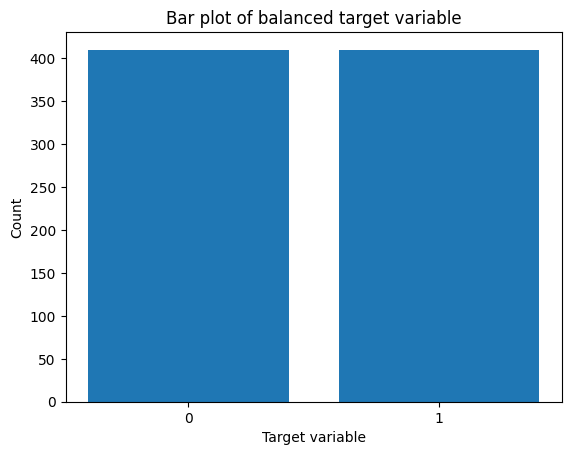

In [ ]:
#check balanced data 
unique, counts = np.unique(model_target, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel('Target variable')
plt.ylabel('Count')
plt.title('Bar plot of balanced target variable')
plt.show()

# **KNN Classifier**

In [ ]:
classifier = KNeighborsClassifier()

# Fit the model to our data
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Use the fitted model to make predictions on the same dataset we trained the model on
train_predictions = classifier.predict(x_train)

print('Model evaluation on the training set: \n')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_train, train_predictions)))

Model evaluation on the training set: 

[[279  52]
 [ 26 299]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       331
           1       0.85      0.92      0.88       325

    accuracy                           0.88       656
   macro avg       0.88      0.88      0.88       656
weighted avg       0.88      0.88      0.88       656

Accuracy :  88.11%


In [ ]:
def acc(classifier):
    classifier.fit(x_train,y_train)
    pred = classifier.predict(x_test)
    print(classification_report(y_test, pred))
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,pred)))

In [ ]:
print('Model evaluation on the testing set: \n')
acc(classifier)

Model evaluation on the testing set: 

              precision    recall  f1-score   support

           0       0.95      0.77      0.85        79
           1       0.82      0.96      0.89        85

    accuracy                           0.87       164
   macro avg       0.89      0.87      0.87       164
weighted avg       0.88      0.87      0.87       164

Accuracy :  87.20%


In [ ]:
knn = KNeighborsClassifier()

# Define hyperparameters grid to search over
param_distributions = {'n_neighbors': [2, 4, 6, 8, 10],
                       'weights': ['uniform', 'distance'],
                        'p': [1, 2]}

# Perform Grid Search Cross-Validation over hyperparameters grid
search = GridSearchCV(knn, param_grid=param_distributions, cv=5)
search.fit(x_train, y_train)

# Print the best parameters and the best score obtained
print("Best hyperparameters: ", search.best_params_)

Best hyperparameters:  {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


In [ ]:
newKNN = KNeighborsClassifier(n_neighbors = 6, p = 1, weights = 'distance')

In [ ]:
acc(newKNN)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        79
           1       0.84      0.95      0.89        85

    accuracy                           0.88       164
   macro avg       0.89      0.88      0.88       164
weighted avg       0.89      0.88      0.88       164

Accuracy :  87.80%


In [ ]:
#Function to produce confusion matrix heatmap
def Cmatrix(classifier):
  classifier.fit(x_train,y_train)
  prediction = classifier.predict(x_test)
  cm = confusion_matrix(y_test, prediction)
  sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", linewidths=1, linecolor='black')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  

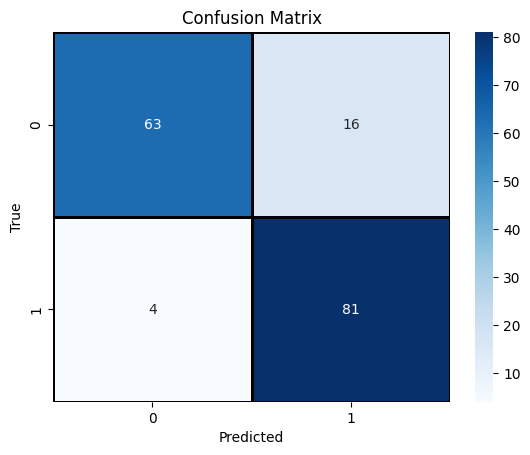

In [ ]:
Cmatrix(newKNN)

# **DecisonTree Classifier** 

In [ ]:
#Split data
m_features = df[df.columns.drop(['HeartDisease'])].values
m_target = df['HeartDisease'].values

#balance the data
balance = RandomUnderSampler(random_state=42)
model_features, model_target = balance.fit_resample(m_features, m_target)

#Split the data
x_train, x_test, y_train, y_test = train_test_split(model_features, model_target, test_size = 0.20, random_state = 2)

In [ ]:
classifier = DecisionTreeClassifier(random_state = 42)

# Fit the model to our data
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Use the fitted model to make predictions on the same dataset we trained the model on
train_predictions = classifier.predict(x_train)

print('Model evaluation on the training set: \n')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Training accuracy:", accuracy_score(y_train, train_predictions))

Model evaluation on the training set: 

[[331   0]
 [  0 325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       325

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656

Training accuracy: 1.0


In [ ]:
print('Model evaluation on the testing set: \n')
acc(classifier)

Model evaluation on the testing set: 

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        79
           1       0.83      0.80      0.81        85

    accuracy                           0.81       164
   macro avg       0.81      0.81      0.81       164
weighted avg       0.81      0.81      0.81       164

Accuracy :  81.10%


In [ ]:
dt = DecisionTreeClassifier(random_state = 42)

# Define hyperparameters grid to search over
param_distributions = {'criterion': ['gini', 'entropy'],
                       'max_depth': [None, 5, 10, 15],
                       'max_leaf_nodes': [2, 5, 10],
                       'max_features': [1, 2, 4],}

# Perform Grid Search Cross-Validation over hyperparameters grid
search = GridSearchCV(dt, param_grid=param_distributions, cv=5)
search.fit(x_train, y_train)

# Print the best parameters and the best score obtained
print("Best hyperparameters: ", search.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 10}


In [ ]:
newDT = DecisionTreeClassifier(max_depth= 5, criterion='gini',max_leaf_nodes=10, max_features=4, random_state = 42)

In [ ]:
acc(newDT)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        79
           1       0.83      0.91      0.87        85

    accuracy                           0.85       164
   macro avg       0.86      0.85      0.85       164
weighted avg       0.86      0.85      0.85       164

Accuracy :  85.37%


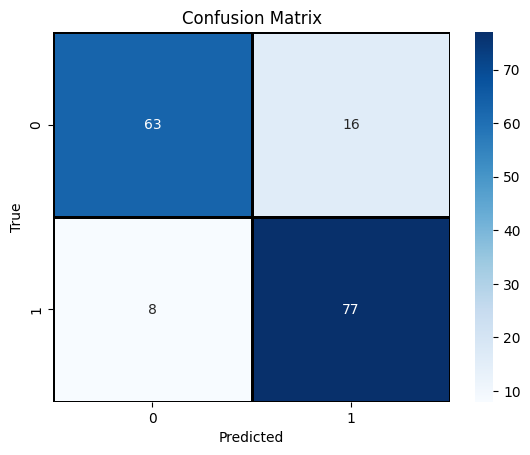

In [ ]:
Cmatrix(newDT)

# **RandomForest**

In [ ]:
m_features = df[df.columns.drop(['HeartDisease'])].values
m_target = df['HeartDisease'].values

#balance the data
balance = RandomUnderSampler(random_state=42)
model_features, model_target = balance.fit_resample(m_features, m_target)

#Split the data
x_train, x_test, y_train, y_test = train_test_split(model_features, model_target, test_size = 0.20, random_state = 2)

In [ ]:
classifier = RandomForestClassifier(random_state = 30)

# Fit the model to our data
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=30)

In [ ]:
# Use the fitted model to make predictions on the same dataset we trained the model on
train_predictions = classifier.predict(x_train)

print('Model evaluation on the training set: \n')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_train, train_predictions)))

Model evaluation on the training set: 

[[331   0]
 [  0 325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       325

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656

Accuracy :  100.00%


In [ ]:
acc(classifier)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        79
           1       0.86      0.91      0.88        85

    accuracy                           0.87       164
   macro avg       0.87      0.87      0.87       164
weighted avg       0.87      0.87      0.87       164

Accuracy :  87.20%


In [ ]:
rfc = RandomForestClassifier(random_state= 30)

param_distributions = {'n_estimators': [10, 20, 30, 40],
                       'max_depth': [2, 4, 6, 8],
                        'min_samples_split': [2, 5]}

# Define the grid search object with 5-fold cross-validation
search = GridSearchCV(rfc, param_grid=param_distributions, cv=5)

# Fit the grid search object on the training data
search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding cross-validation score
print("Best hyperparameters: ", search.best_params_)

Best hyperparameters:  {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 40}


In [ ]:
newRFC = RandomForestClassifier(max_depth = 6, min_samples_split = 5, n_estimators = 40, random_state = 30)

In [ ]:
acc(newRFC)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        79
           1       0.87      0.96      0.92        85

    accuracy                           0.91       164
   macro avg       0.91      0.91      0.91       164
weighted avg       0.91      0.91      0.91       164

Accuracy :  90.85%


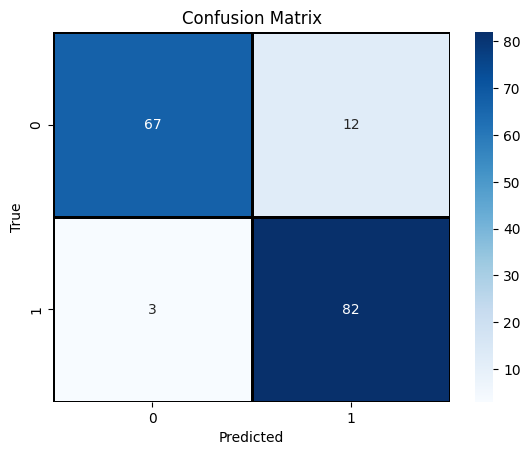

In [ ]:
Cmatrix(newRFC)

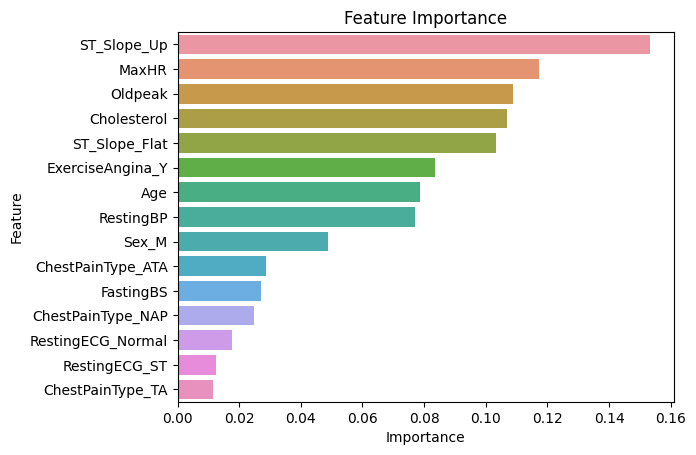

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Get the feature importance values from the trained classifier
importances = rf.feature_importances_

# Get the feature names from the training data
feature_names = df.columns.drop(['HeartDisease'])

# Create a DataFrame of feature importance values with their corresponding feature names
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the DataFrame by feature importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot the feature importance values
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **XGBoost**

In [ ]:
m_features = df[df.columns.drop(['HeartDisease'])].values
m_target = df['HeartDisease'].values

#balance the data
balance = RandomUnderSampler(random_state=42)
model_features, model_target = balance.fit_resample(m_features, m_target)

#Split the data
x_train, x_test, y_train, y_test = train_test_split(model_features, model_target, test_size = 0.20, random_state = 2)

In [ ]:
classifier = XGBClassifier()

# Fit the model to our data
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Use the fitted model to make predictions on the same dataset we trained the model on
train_predictions = classifier.predict(x_train)

print('Model evaluation on the training set: \n')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_train, train_predictions)))

Model evaluation on the training set: 

[[331   0]
 [  0 325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       325

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656

Accuracy :  100.00%


In [ ]:
print('Model evaluation on the test set: \n')
acc(classifier)

Model evaluation on the test set: 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        79
           1       0.88      0.87      0.88        85

    accuracy                           0.87       164
   macro avg       0.87      0.87      0.87       164
weighted avg       0.87      0.87      0.87       164

Accuracy :  87.20%


In [ ]:

xgb = XGBClassifier()

param_distributions = {'learning_rate': [0.01, 0.1, 0.3],
                       'max_depth': [3, 5, 7],
                       'n_estimators': [10, 20, 30, 40]}


# Define the grid search object with 5-fold cross-validation
search = GridSearchCV(xgb, param_grid=param_distributions, cv=5)

# Fit the grid search object on the training data
search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding cross-validation score
print("Best hyperparameters: ", search.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 30}


In [ ]:
newXGB = XGBClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 30)

In [ ]:
acc(newXGB)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        79
           1       0.87      0.92      0.89        85

    accuracy                           0.88       164
   macro avg       0.89      0.88      0.88       164
weighted avg       0.89      0.88      0.88       164

Accuracy :  88.41%


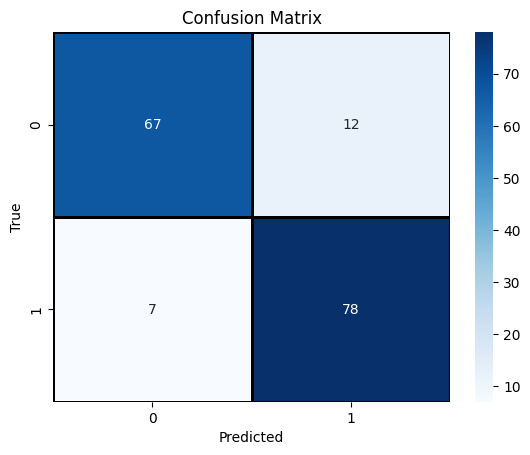

In [ ]:
Cmatrix(newXGB)

# **SVC**

In [ ]:
m_features = df[df.columns.drop(['HeartDisease'])].values
m_target = df['HeartDisease'].values

#balance the data
balance = RandomUnderSampler(random_state=42)
model_features, model_target = balance.fit_resample(m_features, m_target)

#Split the data
x_train, x_test, y_train, y_test = train_test_split(model_features, model_target, test_size = 0.20, random_state = 2)

In [ ]:
from sklearn.svm import SVC
classifier = SVC()

# Fit the model to our data
classifier.fit(x_train, y_train)

SVC()

In [ ]:
# Use the fitted model to make predictions on the same dataset we trained the model on
train_predictions = classifier.predict(x_train)

print('Model evaluation on the training set: \n')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_train, train_predictions)))

Model evaluation on the training set: 

[[294  37]
 [ 32 293]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       331
           1       0.89      0.90      0.89       325

    accuracy                           0.89       656
   macro avg       0.89      0.89      0.89       656
weighted avg       0.89      0.89      0.89       656

Accuracy :  89.48%


In [ ]:
print('Model evaluation on the testing set: \n')
acc(classifier)

Model evaluation on the testing set: 

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        79
           1       0.85      0.95      0.90        85

    accuracy                           0.89       164
   macro avg       0.90      0.89      0.89       164
weighted avg       0.90      0.89      0.89       164

Accuracy :  89.02%


In [ ]:
svc = SVC()

param_distributions = {'C': [0.1, 1, 10, 100],
                       'kernel': ['linear', 'rbf', 'sigmoid'],
                       'gamma': [0.1, 1, 10]}


# Define the grid search object with 5-fold cross-validation
search = GridSearchCV(svc, param_grid=param_distributions, cv=5)

# Fit the grid search object on the training data
search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding cross-validation score
print("Best hyperparameters: ", search.best_params_)

Best hyperparameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
newSVC = SVC(C = 1, gamma = 0.1, kernel = 'rbf')

In [ ]:
acc(newSVC)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        79
           1       0.86      0.94      0.90        85

    accuracy                           0.89       164
   macro avg       0.89      0.89      0.89       164
weighted avg       0.89      0.89      0.89       164

Accuracy :  89.02%


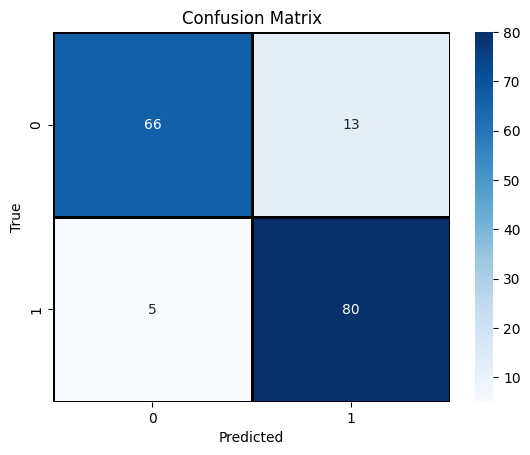

In [ ]:
Cmatrix(newSVC)

# **Stacking**

In [ ]:
%pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vecstack import stacking

In [ ]:
m_features = df[df.columns.drop(['HeartDisease'])].values
m_target = df['HeartDisease'].values

#balance the data
balance = RandomUnderSampler(random_state=42)
model_features, model_target = balance.fit_resample(m_features, m_target)

#Split the data
x_train, x_test, y_train, y_test = train_test_split(model_features, model_target, test_size = 0.20, random_state = 2)

In [ ]:
#Choose models for stacking
models = [
KNeighborsClassifier(n_neighbors = 6, p = 1, weights = 'distance'),

DecisionTreeClassifier(max_depth= 5, criterion='gini',max_leaf_nodes=10, max_features=4, random_state = 42),

RandomForestClassifier(max_depth = 6, min_samples_split = 5, n_estimators = 40, random_state = 30),

XGBClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 30),

SVC(C = 1, gamma = 0.1, kernel = 'rbf'),
]

In [ ]:
#Stacking train and test
S_train, S_test = stacking(models,                 
                           x_train, y_train, x_test,
                           
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=42,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.82575758]
    fold  1:  [0.89312977]
    fold  2:  [0.83206107]
    fold  3:  [0.89312977]
    fold  4:  [0.88549618]
    ----

/usr/local/lib/python3.10/dist-packages/vecstack/core.py:615: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/usr/local/lib/python3.10/dist-packages/vecstack/core.py:615: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.




    MEAN:     [0.86591487] + [0.03040861]
    FULL:     [0.86585366]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.75757576]
    fold  1:  [0.82442748]
    fold  2:  [0.84732824]
    fold  3:  [0.84732824]
    fold  4:  [0.84732824]
    ----
    MEAN:     [0.82479759] + [0.03476148]
    FULL:     [0.82469512]

model  2:     [RandomForestClassifier]
    fold  0:  [0.84090909]
    fold  1:  [0.87022901]
    fold  2:  [0.84732824]
    fold  3:  [0.89312977]
    fold  4:  [0.90076336]
    ----
    MEAN:     [0.87047189] + [0.02383526]
    FULL:     [0.87042683]

model  3:     [XGBClassifier]
    fold  0:  [0.81818182]
    fold  1:  [0.86259542]


/usr/local/lib/python3.10/dist-packages/vecstack/core.py:615: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



    fold  2:  [0.82442748]
    fold  3:  [0.89312977]
    fold  4:  [0.89312977]
    ----
    MEAN:     [0.85829285] + [0.03225366]
    FULL:     [0.85823171]

model  4:     [SVC]
    fold  0:  [0.80303030]
    fold  1:  [0.83969466]
    fold  2:  [0.82442748]
    fold  3:  [0.90839695]
    fold  4:  [0.87022901]
    ----
    MEAN:     [0.84915568] + [0.03682977]
    FULL:     [0.84908537]



/usr/local/lib/python3.10/dist-packages/vecstack/core.py:615: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/usr/local/lib/python3.10/dist-packages/vecstack/core.py:615: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [ ]:
model = RandomForestClassifier(max_depth = 6, min_samples_split = 5, n_estimators = 40, random_state = 30)

model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final Predictiom Accuracy : {0:.2%}'.format(accuracy_score(y_test, y_pred)))

Final Predictiom Accuracy : 87.20%
